In [1]:
#  daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır.
# classificitian grubuna girer.bize bi rakam vermez hangi grupta olduğunu söyler

In [2]:
# veri setini 2 ye ayırıyoruz.büyük kısım eğitmek için diğer kısım eğitmek için kullanacağız.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# 1 şeker hastası/diyabet
# 0 sağlıklı

In [14]:
hasta=data[data.Outcome==1]
saglıklı=data[data.Outcome==0]

In [15]:
# şimdi sadece gloucos bakarak örnek bir çizim yapalım.prpogramın sonunda modelimiz tüm verilere bakarak bir tahmin yapacaktır.


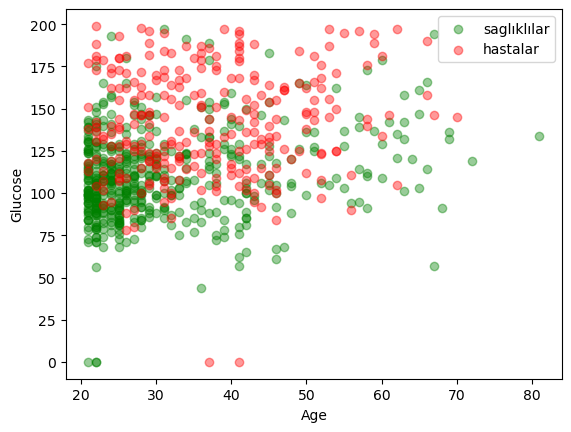

In [16]:
plt.scatter(saglıklı.Age,saglıklı.Glucose,color="green",label="saglıklılar",alpha=0.4)
plt.scatter(hasta.Age,hasta.Glucose,color="red",label="hastalar",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

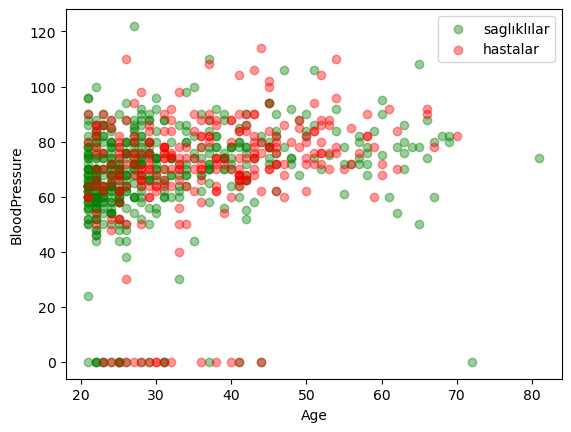

In [17]:
plt.scatter(saglıklı.Age,saglıklı.BloodPressure,color="green",label="saglıklılar",alpha=0.4)
plt.scatter(hasta.Age,hasta.BloodPressure,color="red",label="hastalar",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("BloodPressure")
plt.legend()
plt.show()

In [18]:
y=data.Outcome.values
x_ham_veri=data.drop(["Outcome"],axis=1)

In [19]:
x=(x_ham_veri-np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))
print("normalization öncesi ham veriler:\n")
print(x_ham_veri.head())

normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


C:\Users\veyse\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\veyse\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [20]:
print("\n\n\nNormalization sonrası yapay zeka eğitimi için vereceğimiz veriler:\n")
print(x.head())




Normalization sonrası yapay zeka eğitimi için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


In [21]:
# train data ile test datasını ayırıyoruz.train data saglıklı insan ile hasta insanı ayırt etmek için kullanılacak
# test datası ise makine öğrenmesi modelimiz doğru bir şekilde hasta ve saglıklı insanları ayırt edebiliyor mu 
# diye test etmek için kullanılacak

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [23]:
# knn modelimizi oluşturuyoruz.

In [24]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("K=3 için test verilerimizin doğrulama testi sonucu",knn.score(x_test,y_test)*100)


K=3 için test verilerimizin doğrulama testi sonucu 83.11688311688312


C:\Users\veyse\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\veyse\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [25]:
# en iyi k değerini belirleyelim

In [26]:
sayac=1
for k in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Doğruluk Oranı :%", knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1   Doğruluk Oranı :% 71.42857142857143
2   Doğruluk Oranı :% 71.42857142857143
3   Doğruluk Oranı :% 83.11688311688312
4   Doğruluk Oranı :% 80.51948051948052
5   Doğruluk Oranı :% 81.81818181818183
6   Doğruluk Oranı :% 83.11688311688312
7   Doğruluk Oranı :% 80.51948051948052
8   Doğruluk Oranı :% 80.51948051948052
9   Doğruluk Oranı :% 79.22077922077922
10   Doğruluk Oranı :% 79.22077922077922


C:\Users\veyse\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\veyse\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [27]:
#  polikliniğe gelen yeni bir hastanın tahlil sonuçlarına göre hasta olup olmadığına dair tahmin için 

In [28]:
# yeni bir hasta tahmini 

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
sc=MinMaxScaler()
sc.fit_transform(x_ham_veri)
new_prediction=knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\veyse\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\veyse\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\veyse\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1